In [37]:
import tweepy as tw
import pandas as pd
import nltk
import os
import csv
import re
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [38]:
API_key = "Vj5rWOSwql3LTd7baEF2h05IG"
API_secret_key = "071UadVfFpWUFGOWT8K8sAuw8djtBVIkN9xVnOx5SGs6WcFCUv"

Access_token = "937598380854755328-8f7VGt60am6j8h0sBn1hN91vyuV1Y18"
Access_token_secret = "sfAWySvOQiw2fEhQxQN2qJJZ9M1yWcCvgHeeWXFo7JL8k"


In [39]:
Auth = tw.OAuthHandler(API_key, API_secret_key)
Auth.set_access_token(Access_token, Access_token_secret)
Api= tw.API(Auth,wait_on_rate_limit=True)

In [40]:
twittertags = ["coronavirus"]

In [41]:
def cleantext(tw):
    cleanedtext =re.sub(r"http\S+", "",tw)
    cleanedtext =re.sub('@[^\s]+',"",cleanedtext)
    cleanedtext =re.sub(r"[^a-zA-z0-9]+", ' ',cleanedtext)
    cleanedtext =re.sub(r"\d+", ' ',cleanedtext)
    cleanedtext =re.sub(r'\b\w{1,2}\b','',cleanedtext)
    return cleanedtext

In [ ]:
for i in twittertags:
    csv_File = open(i+'.csv','a')
    #use csv writer
    with open(i+'.csv','w', newline='')as csv_out:
        writer=csv.DictWriter(csv_out, fieldnames =["TWEETS"])
        writer.writeheader()
        csv_writer = csv.writer(csv_File)
        
    for tweet in tw.Cursor(Api.search,q="#"+i+"-filter:retweets",count=500,
                                lang="en",tweet_mode='extended').items():
        new_text = cleantext(tweet.full_text)
        csv_writer.writerow([new_text])


In [42]:
data_JUNE= pd.read_csv(r"D:\python\3335\untitled\Data\COVID19.csv")
data = data_JUNE.copy()

In [43]:
data_JUNE.head()

,TWEETS
0,Face screaming fearFace screaming fearFace...
1,states that day home isolation compulsory ...
2,All Party Leaders Calls For Chalo Pragathi Bha...
3,ALERT Georgia teachers honk horns protest re...
4,From the archives Oregon Gov Temporarily Halts...


In [44]:
data_JUNE = data_JUNE.dropna()

In [45]:
data_JUNE.columns

Index(['TWEETS'], dtype='object')

In [46]:
data_JUNE

,TWEETS
0,Face screaming fearFace screaming fearFace...
1,states that day home isolation compulsory ...
2,All Party Leaders Calls For Chalo Pragathi Bha...
3,ALERT Georgia teachers honk horns protest re...
4,From the archives Oregon Gov Temporarily Halts...
...,...
810,Once again anecdotal reports are not evidence...
811,Hotels around the world are utilizing increasi...
812,Belize gov declares state emergency respons...
813,NSTworld Global Covid cases surpass million


In [47]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [48]:
df=data.copy()

In [49]:
df

,TWEETS
0,Face screaming fearFace screaming fearFace...
1,states that day home isolation compulsory ...
2,All Party Leaders Calls For Chalo Pragathi Bha...
3,ALERT Georgia teachers honk horns protest re...
4,From the archives Oregon Gov Temporarily Halts...
...,...
810,Once again anecdotal reports are not evidence...
811,Hotels around the world are utilizing increasi...
812,Belize gov declares state emergency respons...
813,NSTworld Global Covid cases surpass million


In [50]:
df["SUBJECTIVITY"] = df["TWEETS"].apply(getsubjectivity)
df["POLARITY"] = df["TWEETS"].apply(getpolarity)

In [51]:
df

,TWEETS,SUBJECTIVITY,POLARITY
0,Face screaming fearFace screaming fearFace...,0.408333,0.000
1,states that day home isolation compulsory ...,0.366667,0.000
2,All Party Leaders Calls For Chalo Pragathi Bha...,0.000000,0.000
3,ALERT Georgia teachers honk horns protest re...,0.000000,0.000
4,From the archives Oregon Gov Temporarily Halts...,0.000000,0.000
...,...,...,...
810,Once again anecdotal reports are not evidence...,0.650000,0.000
811,Hotels around the world are utilizing increasi...,1.000000,0.375
812,Belize gov declares state emergency respons...,0.000000,0.000
813,NSTworld Global Covid cases surpass million,0.000000,0.000


In [52]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df["SUBJECTIVITY"] = df["TWEETS"].apply(getsubjectivity)
df["POLARITY"] = df["TWEETS"].apply(getpolarity)

def getpolarity(text):
    return TextBlob(text).sentiment.polarit

def getanalysis(score):
    if score ==0:
        return("Neutral")
    elif score > 0:
        return("Positive")
    else:
        return("Negative")
        
df["ANALYSIS"] = df["POLARITY"].apply(getanalysis)

In [53]:
df

,TWEETS,SUBJECTIVITY,POLARITY,ANALYSIS
0,Face screaming fearFace screaming fearFace...,0.408333,0.000,Neutral
1,states that day home isolation compulsory ...,0.366667,0.000,Neutral
2,All Party Leaders Calls For Chalo Pragathi Bha...,0.000000,0.000,Neutral
3,ALERT Georgia teachers honk horns protest re...,0.000000,0.000,Neutral
4,From the archives Oregon Gov Temporarily Halts...,0.000000,0.000,Neutral
...,...,...,...,...
810,Once again anecdotal reports are not evidence...,0.650000,0.000,Neutral
811,Hotels around the world are utilizing increasi...,1.000000,0.375,Positive
812,Belize gov declares state emergency respons...,0.000000,0.000,Neutral
813,NSTworld Global Covid cases surpass million,0.000000,0.000,Neutral


In [54]:
j=1
sortedDF = df.sort_values(by=["POLARITY"],ascending=False)
for i in range(0, df.shape[0]):
    if (sortedDF["ANALYSIS"][i]=="Positive"):
        print(str(j) + ") " + sortedDF["TWEETS"][i])
        print()
        j=j+1

1) Latest News  Brief Aug     Iran Coronavirus Death Toll    Cities Exceeds     Iran  oil industry workers are  strike Here  why  matters Mullahs Regime Main Reason for Powerful COVID  Outbreak  Iran 

2) CoronaVirus Latest Updates  Andhra Pradesh Telangana And India          August   UnionHealthMinistry IndiaLockDown IndiaUnlock PMModi CoronavirusDeathtoll CoronavirusInTelangana CoronavirusInAP CoronavirusInIndia Coronavirus Covid  MangoNews 

3)  NEED THIS NOW This book will lift you  happiness stress gratitude covid_  coronavirus 

4)  View  COVID    First Wave  Cybersecurity CyberSecurity CoronaVirus Ransonware Phishing CyberAttack QAcycle 

5)  CoronaVirusUpdate Total cases       Active cases       Cured discharged       The death toll rose      after   people succumbed  the disease Read more updates  coronavirus here 

6) New Ways  coronavirus testing 

7) ALHAMDULLIAH Pakistan  recovery rate from coronavirus climbs      with     new recoveries  the past   hours Overall   new dea

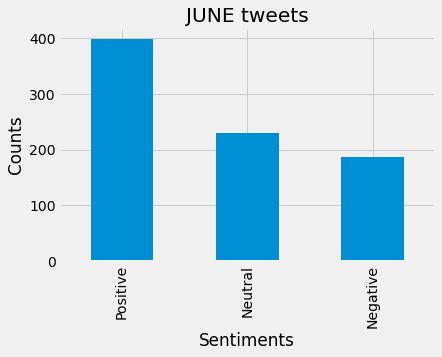

In [55]:
df["ANALYSIS"].value_counts().plot(kind="bar")
plt.title("JUNE tweets")
plt.xlabel("Sentiments")
plt.ylabel("Counts")
plt.show()

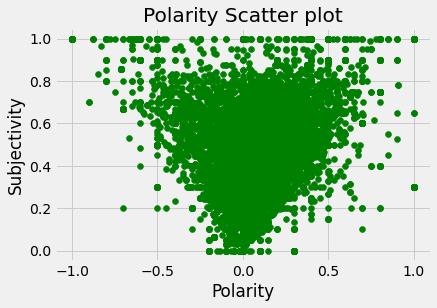

In [25]:
for i in range(0, df.shape[0]):
    plt.scatter(df["POLARITY"][i], df["SUBJECTIVITY"][i], color = ['green'])

plt.title("Polarity Scatter plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [56]:
data_JUNE= pd.read_csv(r"D:\python\3335\untitled\Data\corona_tweets_JUNE.csv")
data_AUG= pd.read_csv(r"D:\python\3335\untitled\Data\corona_tweets_AUG.csv")

In [57]:
data_JUNE.columns = ["ID","POLARITY" ]
data_AUG.columns = ["ID","POLARITY" ]

In [58]:
def getanalysis(score):
    if score ==0:
        return("Neutral")
    elif score > 0:
        return("Positive")
    else:
        return("Negative")

In [59]:
data_JUNE["ANALYSIS"] = data_JUNE["POLARITY"].apply(getanalysis)

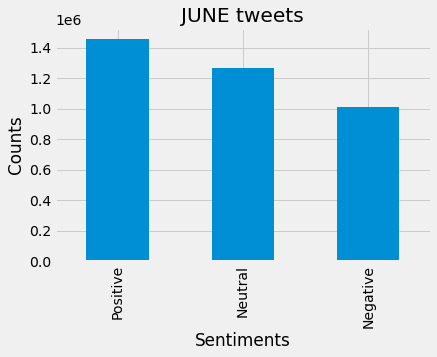

In [60]:
data_JUNE["ANALYSIS"].value_counts().plot(kind="bar")
plt.title("JUNE tweets")
plt.xlabel("Sentiments")
plt.ylabel("Counts")
plt.show()

In [61]:
data_AUG["ANALYSIS"] = data_AUG["POLARITY"].apply(getanalysis)

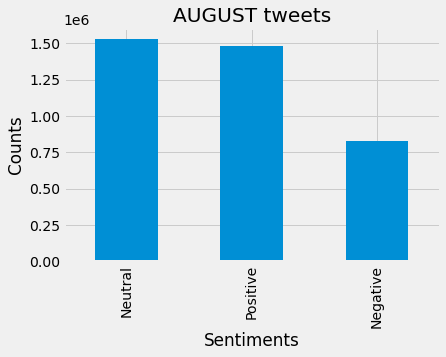

In [62]:
data_AUG["ANALYSIS"].value_counts().plot(kind="bar")
plt.title("AUGUST tweets")
plt.xlabel("Sentiments")
plt.ylabel("Counts")
plt.show()

In [63]:
data_JUNE

,ID,POLARITY,ANALYSIS
0,1274921538869800960,0.033333,Positive
1,1274921539138453505,0.500000,Positive
2,1274921539088134144,0.244444,Positive
3,1274921539071143936,0.000000,Neutral
4,1274921539389976576,0.000000,Neutral
...,...,...,...
3730099,1275283686372642817,0.000000,Neutral
3730100,1275283686464733184,0.800000,Positive
3730101,1275283686511063042,0.100000,Positive
3730102,1275283686188081152,0.000000,Neutral


In [82]:
data_JUNE= pd.read_csv(r"D:\python\3335\untitled\Data\COVID19.csv")
data = data_JUNE.copy()

In [83]:
data_JUNE_wc = data.copy()
data_JUNE_wc = data_JUNE_wc.dropna()
df =  data_JUNE_wc.copy()

In [84]:
df["SUBJECTIVITY"] = df["TWEETS"].apply(getsubjectivity)
df["POLARITY"] = df["TWEETS"].apply(getpolarity)

In [85]:
def getanalysis(score):
    if score ==0:
        return("Neutral")
    elif score > 0:
        return("Positive")
    else:
        return("Negative")
        
df["ANALYSIS"] = df["POLARITY"].apply(getanalysis)

In [86]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

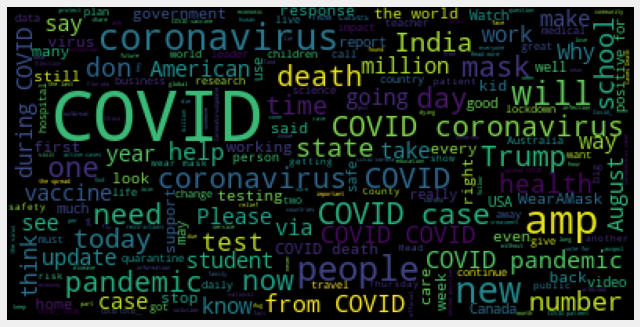

In [89]:
word = ",".join(data_JUNE_wc["TWEETS"])
wordcloud = WordCloud(max_font_size=45, max_words=len(word)).generate(word)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()